In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]]) #samee:))))
#we reverse the dict and then join thrm up with padding

550378/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[10]

3

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [15]:
#output class has gone from 2 to 46
#soo use 64 instead of 16
#last layer==not of outputs==46

In [16]:
""" The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the lab """

' The best loss function to use in this case is categorical_crossentropy. It measures\nthe distance between two probability distributions: here, between the probability dis\x02tribution output by the network and the true distribution of the lab '

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
from keras import losses
from keras import metrics
from keras import optimizers
from keras import models
from keras import layers

In [21]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.7327 - accuracy: 0.4721 - val_loss: 1.8463 - val_accuracy: 0.6100
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.5390 - accuracy: 0.6773 - val_loss: 1.3693 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.1680 - accuracy: 0.7507 - val_loss: 1.1916 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9485 - accuracy: 0.7955 - val_loss: 1.0664 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.7758 - accuracy: 0.8341 - val_loss: 0.9881 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6452 - accuracy: 0.8601 - val_loss: 0.9472 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5403 - accuracy: 0.8830 - val_loss: 0.9025 - val_accuracy: 0.8070
Epoch 8/20
16

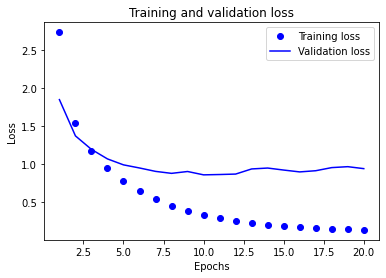

In [23]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()